In [1]:
# import necessary packages
import openeo

# connect with the backend
eoconn = openeo.connect("openeofed.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [2]:
## Setup of parameters
spat_ext = {
    "type": "Polygon",
    "coordinates": [
        [
            [5.170012098271149, 51.25062964728295],
            [5.17085904378298, 51.24882567194015],
            [5.17857421368097, 51.2468515482926],
            [5.178972704726344, 51.24982704376254],
            [5.170012098271149, 51.25062964728295],
        ]
    ],
}
temp_ext = ["2021-05-01", "2021-08-01"]

In [3]:
mogpr = eoconn.datacube_from_process(
    process_id="mogpr_s1s2",
    namespace="https://raw.githubusercontent.com/VITObelgium/openeo_algorithm_catalog/c025cdd72d8c3e97e11412774f440fcdf675dca6/mogpr_s1s2/openeo_udp/mogpr_s1s2.json",
    spatial_extent=spat_ext,
    temporal_extent=temp_ext,
    s1_collection="RVI",
    s2_collection="NDVI",
)

In [ ]:
mogpr_job = mogpr.create_job(title="MOGPR_example")
mogpr_job.start_and_wait()

0:00:00 Job 'cdse-j-2511261346364810bbd13b11bdad8229': send 'start'
0:00:16 Job 'cdse-j-2511261346364810bbd13b11bdad8229': created (progress 0%)
0:00:21 Job 'cdse-j-2511261346364810bbd13b11bdad8229': created (progress 0%)
0:00:28 Job 'cdse-j-2511261346364810bbd13b11bdad8229': created (progress 0%)
0:00:36 Job 'cdse-j-2511261346364810bbd13b11bdad8229': created (progress 0%)
0:00:46 Job 'cdse-j-2511261346364810bbd13b11bdad8229': queued (progress 0%)
0:00:59 Job 'cdse-j-2511261346364810bbd13b11bdad8229': queued (progress 0%)
0:01:14 Job 'cdse-j-2511261346364810bbd13b11bdad8229': queued (progress 0%)
0:01:33 Job 'cdse-j-2511261346364810bbd13b11bdad8229': queued (progress 0%)
0:01:57 Job 'cdse-j-2511261346364810bbd13b11bdad8229': running (progress N/A)
0:02:28 Job 'cdse-j-2511261346364810bbd13b11bdad8229': running (progress N/A)
0:03:05 Job 'cdse-j-2511261346364810bbd13b11bdad8229': running (progress N/A)
0:03:52 Job 'cdse-j-2511261346364810bbd13b11bdad8229': running (progress N/A)
0:04:50 

In [5]:
results = mogpr_job.get_results()
results.download_files("output/mogpr/")

[PosixPath('output/mogpr/openEO_2021-05-01Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-03Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-04Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-06Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-07Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-09Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-10Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-12Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-13Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-15Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-16Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-18Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-19Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-21Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-22Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-25Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-27Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-28Z.tif'),
 PosixPath('output/mogpr/openEO_2021-05-30Z.tif'),
 PosixPath('output/mogpr/openEO

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


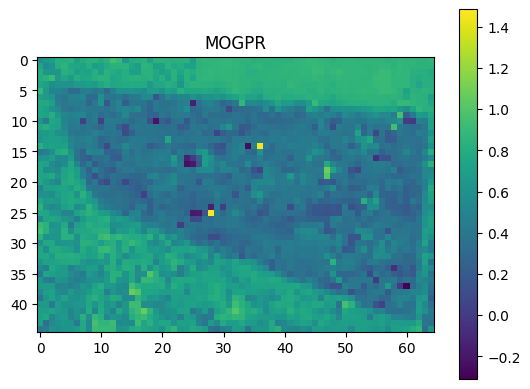

In [6]:
import rasterio
import matplotlib.pyplot as plt

img = rasterio.open("output/mogpr/openEO_2021-05-01Z.tif")
# plot the first band
plt.imshow(img.read(1))
plt.colorbar()
plt.title("MOGPR")
plt.show()